# 220968280 - Anirudh Swaminathan - DSE A2

## exercise1-week7 time series analysis on employment.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame()

In [3]:
df = pd.read_csv('employment.csv')

In [4]:
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,01-01-2000,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,01-02-2000,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,01-03-2000,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,01-04-2000,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,01-05-2000,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,01-10-2009,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,01-11-2009,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,01-12-2009,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,01-01-2010,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


### 1. Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.

In [5]:
df['datestamp'] = pd.to_datetime(df['datestamp'], format='%d-%m-%Y')
df = df.set_index(df['datestamp'])
df = df.drop(columns='datestamp', axis=1)

In [6]:
df

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


### 2. Generate a boxplot to find the distribution of unemployment rate for every industry .

<AxesSubplot:>

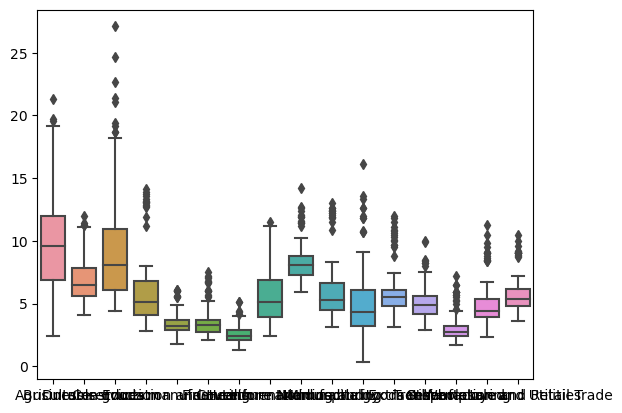

In [7]:
sns.boxplot(data=df)

### 3. Using line chart Visualize the unemployment rate of workers by industry

<AxesSubplot:xlabel='datestamp'>

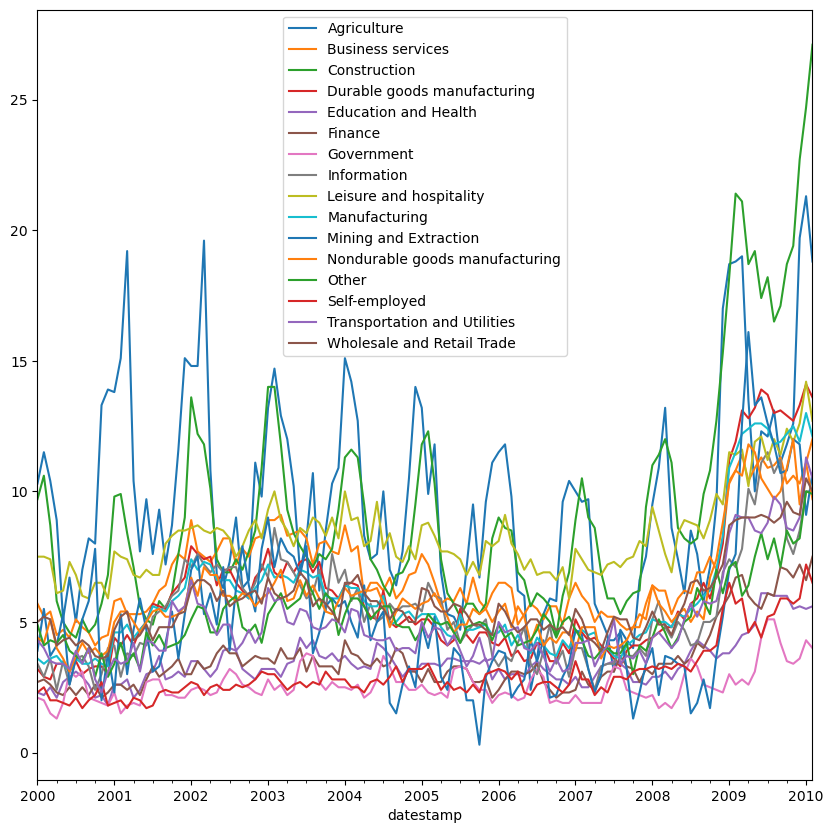

In [8]:
df.plot(figsize=(10,10))

### 4. Plot the monthly and yearly trends .

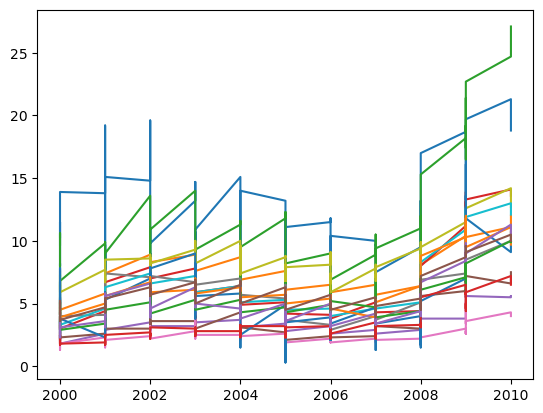

In [13]:
year = df
year = year.set_index(df.index.year)
plt.plot(year)

<AxesSubplot:ylabel='Count'>

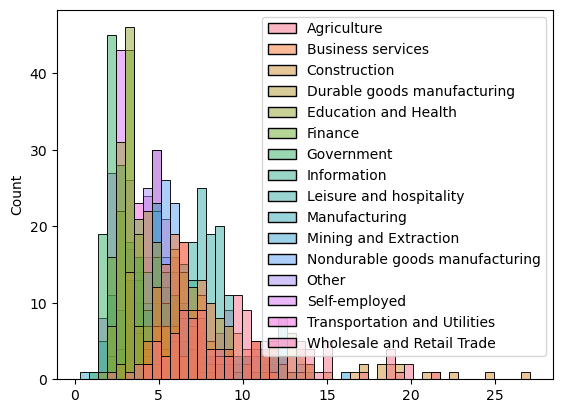

In [16]:
month = df
month = month.set_index(df.index.month)
sns.histplot(month)

### 5. Apply time series decomposition to your dataset to visualize the trend and seasonality .

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api
df1 = df
df_seasonal = df1.apply(lambda x: seasonal_decompose(x, model='additive').trend)

<AxesSubplot:xlabel='datestamp'>

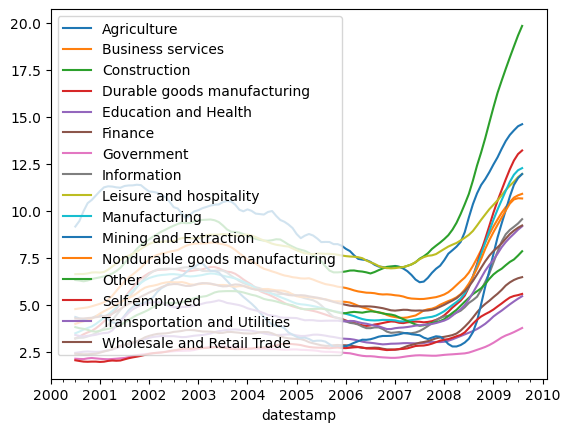

In [30]:
df_seasonal.plot()

### 6. Visualize the seasonality of Agriculture, Health and Finance sector

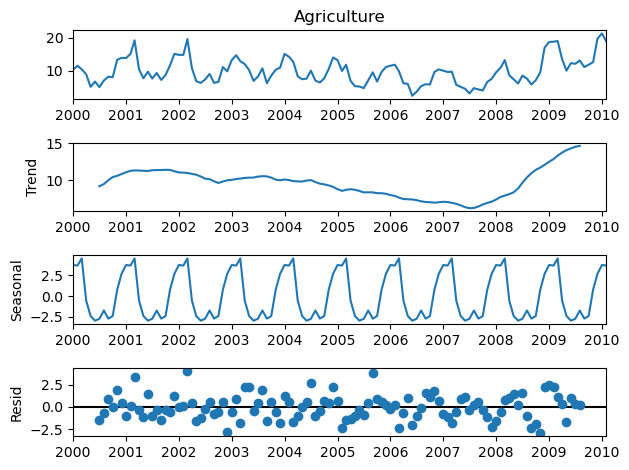

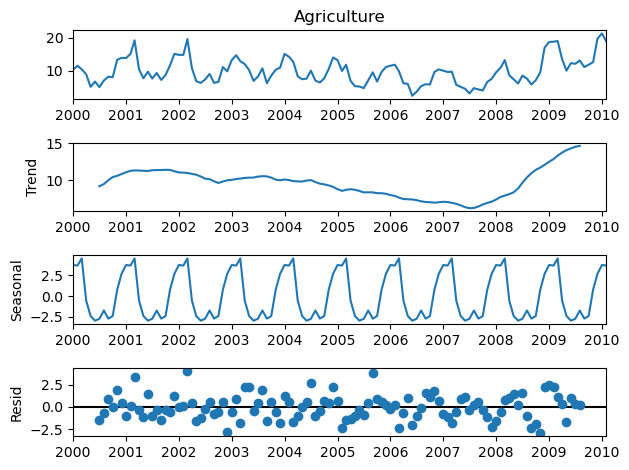

In [32]:
statsmodels.tsa.seasonal.seasonal_decompose(df['Agriculture'], model='additive').plot()

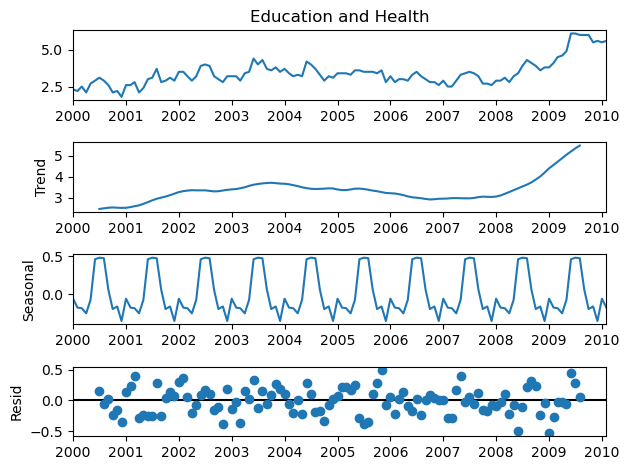

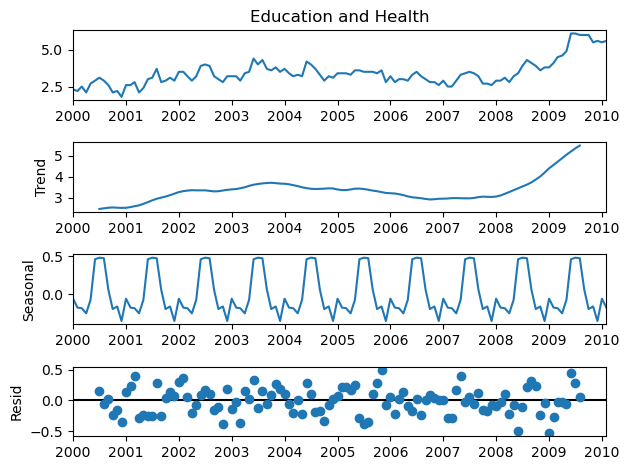

In [35]:
statsmodels.tsa.seasonal.seasonal_decompose(df['Education and Health'], model='additive').plot()

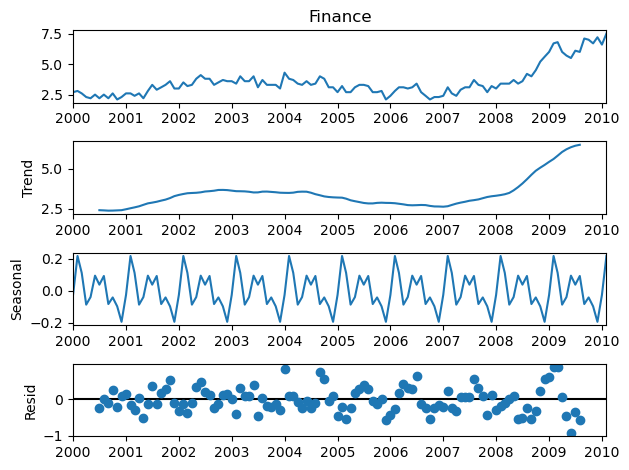

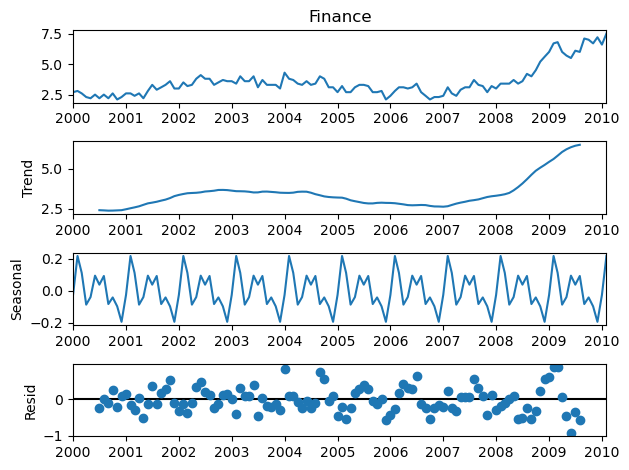

In [36]:
statsmodels.tsa.seasonal.seasonal_decompose(df['Finance'], model='additive').plot()

### 7. Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.

<AxesSubplot:>

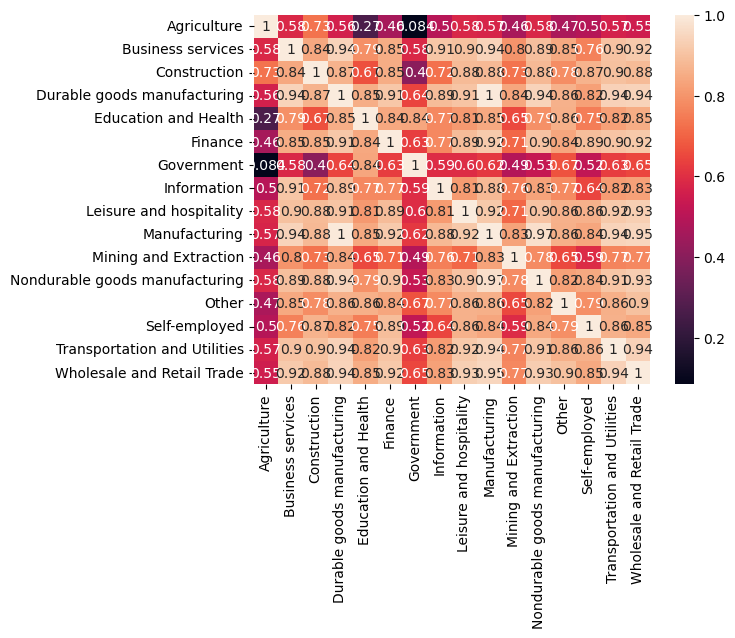

In [39]:
sns.heatmap(df.corr(), annot=True)